In [97]:
# Importing the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [8]:
# Data Collection and Analysis.
# Loading the data in the csv file into a pandas Data Frame.
df = pd.read_csv('train.csv')

In [9]:
# Getting the first Five rows in the data frame.
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
# Getting the last Five rows in the data frame.
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [11]:
# Checking the nnumber of rows and columns.
df.shape

(8523, 12)

In [12]:
# Getting the data types of the features in the data set.
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
# Checking for the missing values in the data frame.
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
# Handling the missing values.
# we can remove the entire records of null values but they are present in huge amounts.
# so we need to handle those values using mean or mode averaging techniques.

# Mean of Item Weight Column
df['Item_Weight'].mean()

12.857645184135976

In [33]:
# Filling the missing values in Item Weight Column with the mean value.
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [39]:
# As we cant calculate mean for outlet size were replacing it with mode.
# Calculating the mode for the respective outlet type.
mode_of_outlet_size = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [38]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [41]:
missing_values = df['Outlet_Size'].isnull()

In [42]:
# Replacing the values with mode value.
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [43]:
# Checking the records again for null values.
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
# Checking for the duplicates.
df.duplicated().sum()

0

In [15]:
# As duplicates are found we're dropping them.
#df.drop_duplicates(inplace = True)
# Checking the duplicates again
#df.duplicated().sum()

In [16]:
# Getting the statistical measures for the data frame.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


c:\users\manoh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


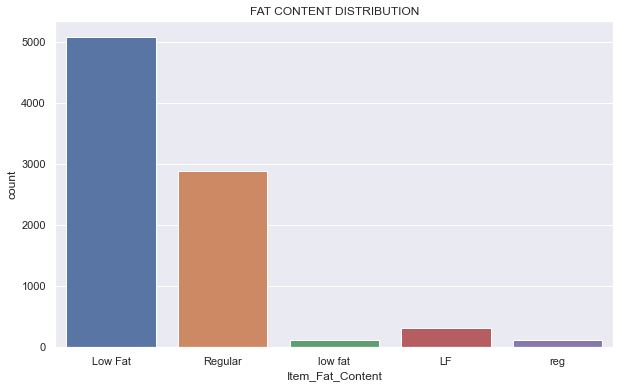

In [44]:
# Plotting Distributions.
# Plotting the count of fat content column.
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(df['Item_Fat_Content'])
plt.title('FAT CONTENT DISTRIBUTION')
plt.show()

In [51]:
# We need to change the last three columns to low fat and regular
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

c:\users\manoh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


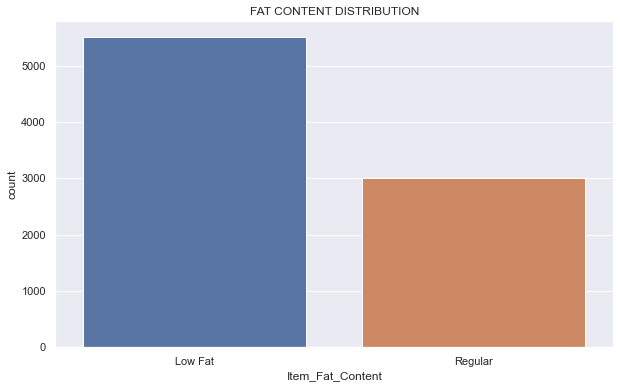

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [55]:
# Plotting the count of fat content column.
sns.set()
plt.figure(figsize=(10,6))
sns.countplot(df['Item_Fat_Content'])
plt.title('FAT CONTENT DISTRIBUTION')
plt.show()
df['Item_Fat_Content'].value_counts()

c:\users\manoh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


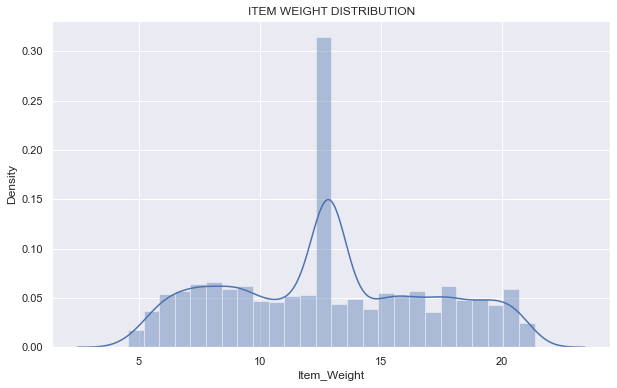

In [45]:
# Plotting item weight distribution.
sns.set()
plt.figure(figsize=(10,6))
sns.distplot(df['Item_Weight'])
plt.title('ITEM WEIGHT DISTRIBUTION')
plt.show()

c:\users\manoh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


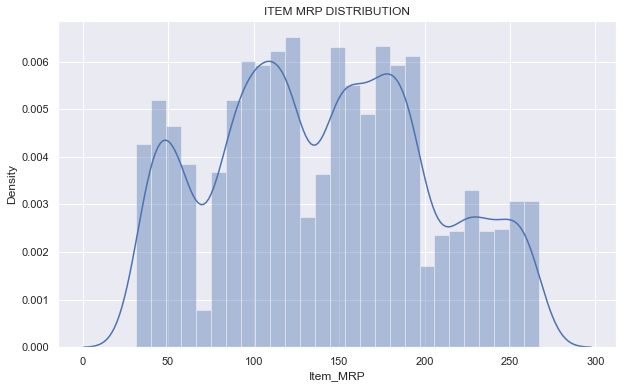

In [46]:
# Plotting mrp distribution.
sns.set()
plt.figure(figsize=(10,6))
sns.distplot(df['Item_MRP'])
plt.title('ITEM MRP DISTRIBUTION')
plt.show()

c:\users\manoh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


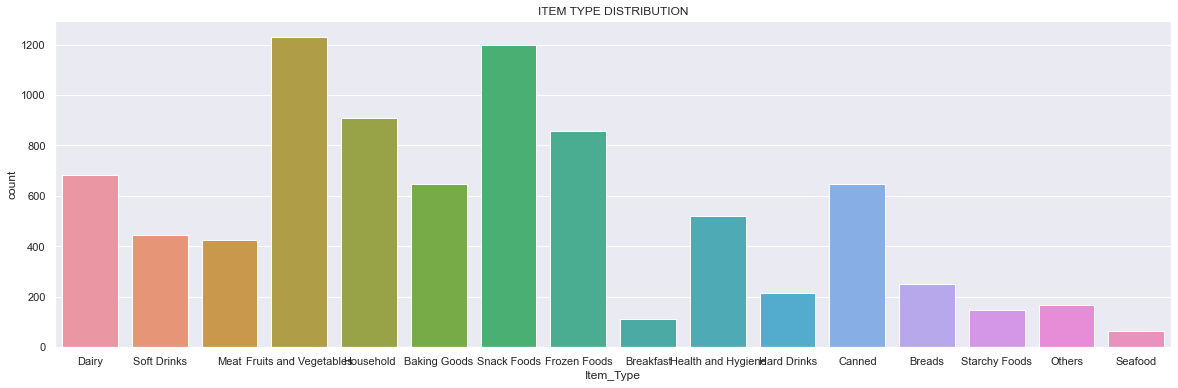

In [47]:
# Plotting the countplot of type of items.
sns.set()
plt.figure(figsize=(20,6))
sns.countplot(df['Item_Type'])
plt.title('ITEM TYPE DISTRIBUTION')
plt.show()

In [62]:
# Label Encoding
# To make all categorical values to numerical values.
le = LabelEncoder()
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

In [63]:
# Getting the first Five rows in the data frame again.
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [64]:
# Splitting the features and Target
# We are using all the features to predict Item_Outlet_Sales.
# So the Item_Outlet_Sales column will be Target
# And all other columns will be Features.

X = df.drop(columns='Item_Outlet_Sales',axis=1)
Y = df['Item_Outlet_Sales']

In [65]:
# Checking X and Y values.
print(X,Y,sep="\n\n")

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [75]:
# Splitting the data into Training data and testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [76]:
# Checking the shapes of training and testing data.
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [77]:
# Loading the model
model = XGBRegressor()

In [78]:
# Training the model.
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [79]:
# Model Evaluation
# Accuracy for prediction on training data
# Storing the predicted values on training_data_pprediction.

training_data_prediction = model.predict(X_train) 
print(training_data_prediction)

[2282.8953 2747.0928 3261.0574 ... 3018.064  1758.2231 1793.024 ]


In [91]:
# Error Testing for Training Data 

#  R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R Squared Error:   ", score_1)
print("Mean Absolute Error:   ", score_2)

R Squared Error:    0.8639680373364909
Mean Absolute Error:    448.97749532567457


In [83]:
# Accuracy for prediction on testing data
testing_data_prediction = model.predict(X_test) 
print(testing_data_prediction)

[2108.4238 3464.7761 1560.9819 ... 2498.0312 2346.4548 3670.081 ]


In [90]:
# Error Testing for Testing Data 

#  R Squared Error
score_1 = metrics.r2_score(Y_test, testing_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, testing_data_prediction)

print("R Squared Error:   ", score_1)
print("Mean Absolute Error:   ", score_2)

R Squared Error:    0.5233136709735687
Mean Absolute Error:    847.7947437393422


In [96]:
# Building a predictive system.
# Taking input for all columns.
#input_data = [...............]

# Converting into numpy array.
#|input_numpy = np.array(input_data)
#print(input_numpy)

# Reshaping the numpy array to (1,1).
#input_reshaped = input_numpy.reshape(1,-1)
#print(input_reshaped)

# Predicting the output.
#predicted_value = model.predict(input_reshaped)
#print(predicted_value)